# 05: Predicting from Data: Linear Regression

<center><img src="figs/02_regression.png" alt="Drawing" width=450px/></center>
<center>Want to know if a house/car/bicycle/computer is a good deal? Linear functions can help.</center>


# Outline of ECE 3

- 01: Welcome to Python
- 02: Visualizing Data in Python
- 03: Computing with Data in Python
- 04: Summarizing Data in Python
- **05: Predicting from Data with Machine Learning in Python**
  - A. Clustering
  - **B. Linear regression**
  - C. Dimension Reduction

# Outline of Linear Regression

- **05: Predicting from Data with Machine Learning in Python**
  - **B. Linear regression**
      - Matrix-vector multiplication
      - Matrix-matrix multiplication
      - Matrix inverse
      - Linear and affine functions
      - Regression and linear regression
      - Fitting linear regression
      
For undergrads: aim for 3 min / slide, i.e. 25 slides in 75 min.

# TODO: define R^n and R^m

### Matrix-vector multiplication

$\color{#EF5645}{\text{Definition}}$: The _matrix-vector multiplication_ $y$ of $m\times n$ matrix $A$ and $n$-vector $x$ is denoted $y = Ax$ and is defined as:
$$y_i = A_{i1}x_1 + ... + A_{in}x_{n}, \quad i=1,...,m$$

$\color{#047C91}{\text{Exercise}}$: Let $I$ be the $n \times n$ identity matrix and $x$ an $n$-vector. Compute $Ix$.

$\color{#047C91}{\text{Exercise}}$: Let $0_n$ be the $n \times n$ zeroes matrix and $x$ an $n$-vector. Compute $0_nx$.

$\color{#047C91}{\text{Exercise}}$: Compute the matrix-vector multiplication of:
$$A = \begin{vmatrix}
0 & 2 & -1 \\
-2 & 1 & 1 \end{vmatrix}; \quad v = \begin{vmatrix}
    2 \\
    1 \\
    -1
    \end{vmatrix}$$

$\color{#003660}{\text{In Python}}$, we use `np.matmul` or the symbol `@`.

In [28]:
print(A)
x = np.array([1, 2, 3]); print(x)

print(np.matmul(A, x))
print(A @ x)

[[ 1  0 -1]
 [ 0  1  1]]
[1 2 3]
[-2  5]
[-2  5]


$\color{#047C91}{\text{Exercise}}$: Take $m\times n$ matrix $A$, and one-hot vector $e_i$ for some $i$ in $1,..., m$. Compute $Ae_i$.

### Matrix Multiplication

$\color{#EF5645}{\text{Definition}}$: Consider $m \times p$ matrix $A$ and $p \times n$ matrix $B$. The _matrix multiplication_, written $C = AB$ is defined as:
$$C_{ij} = \sum_{k=1}^p  A_{ik}B_{kj} \text{ for } i= 1, ...m , j = 1, ...n$$

$\color{#047C91}{\text{Exercise}}$: Compute the matrix multiplication for the following matrices.

<center><img src="figs/09_mat_ab.png" width=400px alt="default"/></center>

### Special Cases of Matrix Multiplication

$\color{#EF5645}{\text{Remark}}$: For $x, y$ vectors, and $A$ a matrix, the following are special cases of matrix multiplication:
- inner-product $x^T y$,
- matrix vector multiplication $Ax$.


$\color{#EF5645}{\text{Definition}}$: The _outer product_ of $m$-vector $x$ and $n$-vector $y$ is defined as $xy^T$. It is also a special case of matrix multiplication.

$\color{#6D7D33}{\text{Properties}}$: For matrices $A, B, C$ and identity matrix $I$, we have the properties:
- Associativity: $$(AB)C = A(BC)$$
- Distributivity: $$A(B+C)  = AB + AC$$
- Transpose: $$(AB)^T = B^T A^T$$
- $AI = A$ and $IA = A$.

$\color{#047C91}{\text{Exercise}}$: Compute $B^TA^T$ for the following matrices.
<center><img src="figs/09_mat_ab.png" width=500px alt="default"/></center>

$\color{#EF5645}{\text{Important remark}}$: $AB = BA$ does NOT hold in general. We say that the matrix multiplication is NOT commutative.

$\color{#047C91}{\text{Exercise}}$: Compute $BA$ for the following matrices. Observe that it differs from $AB$.

<center><img src="figs/09_mat_ab.png" width=400px alt="default"/></center>


### Exercises

$\color{#047C91}{\text{Exercise}}$: Let $A$ be a matrix and $I$ be the identity matrix. Show that $AI = A$.

$\color{#047C91}{\text{Exercise}}$: Given $m$-vector $x$ and $n$-vector $y$, write the outer product $xy^T$ using the entries of $x$ and $y$.

$\color{#003660}{\text{In Python}}$, we us `np.matmul` or `@` to compute the matrix multiplication. Verify that the matrix multiplication is generally NOT commutative by choosing matrices $A, B$ and computing $AB$ and $BA$.

In [8]:
import numpy as np
A = np.array([[1., 3.],[3., 5.]])
B = np.array([[-1., 3.3],[3.6, 5.6]])
C = A @ B; print(C) #np.matmul(A, B)
B @ A

[[ 9.8 20.1]
 [15.  37.9]]


array([[ 8.9, 13.5],
       [20.4, 38.8]])

### Inner-product interpretation

$\color{#6D7D33}{\text{Properties}}$: Consider matrices $A, B$ with $a_i^T$ the rows of $A$ nd $b_j$ the columns of $B$. We have: 

<center><img src="figs/09_ab_innerprod.png" width=500px alt="default"/></center>


The matrix multiplication gathers the inner-products of rows of $A$ and columns of $B$.

### Building Matrices from Matrices

$\color{#EF5645}{\text{Definition}}$: Let $A$ be an $m \times n$ matrix with columns $a_1, .., a_n$. The Gram matrix $G$ of $A$ is:
<center><img src="figs/09_gram.png" width=600px alt="default"/></center>
 The Gram matrix gives all inner products of columns of $A$.

$\color{#6D7D33}{\text{Property}}$: If $G = I$ then columns of $A$ are orthonormal.

$\color{#047C91}{\text{Exercise}}$: Take the adjacency matrix associated with the graph below. We state that $(A^l)_{ij}$ is equal to number of paths of length $l$ going from $j$ to $i$.

<center><img src="figs/09_adjacency.png" alt="default", width=650px/></center>


Verify this statement in a special case, by computing $(A^2)_{11}$.

### Inverse

$\color{#EF5645}{\text{Definition}}$: If ...

We say that $A$ is invertible. 

We denote $A^{-1}$ the (unique) inverse of $A$.



$\color{#6D7D33}{\text{Properties}}$:
- If $A$ is invertible then $A$ is square.
- The inverse of the inverse is: $(A^{-1})^{-1} = A$.

$\color{#047C91}{\text{Exercise}}$: Prove the above statements.

### Which Matrices are Invertible?

$\color{#6D7D33}{\text{Properties}}$: These matrices are always invertible:
- Any lower triangular matrix $L$ with nonzero diagonal entries is invertible. 
- Any upper triangular $R$ with nonzero diagonal entries is invertible.

$\color{#047C91}{\text{Exercise}}$: Give examples of invertible matrices.

### Computing Inverses: $2 \times 2$ matrices

$\color{#6D7D33}{\text{Properties}}$: Consider $A$ is a $2 \times 2$ matrix:
- $A$ is invertible if and only if $A_{11}A_{22} \neq A_{12}A_{21}$.
- In this case:

<center><img src="figs/lec10_2by2_inverse.png" width=400px alt="default"/></center>


$\color{#047C91}{\text{Exercise}}$: Compute the inverse of:

<center><img src="figs/lec10_exercise_2by2_inverse.png" width=100px alt="default"/></center>


###  Computing Inverses

$\color{#6D7D33}{\text{Properties}}$: Some matrices have "easy" inverses:
- The identity matrix: 
  - Then $I^{-1} = I$
- A square $Q$ matrix that verifies $Q^TQ = I$:
  - Then $Q^{-1} = Q^T$.
- A diagonal matrix $D = diag(a_1, ..., a_n)$ with nonzero elements:
  - Then $D^{-1} = diag(\frac{1}{a_1}, ..., \frac{1}{a_n}).$

### Computing Inverses

$\color{#6D7D33}{\text{Properties}}$: Consider invertible square matrices $A, B$ with known inverses $A^{-1}, B^{-1}$.
- $(AB)^{-1} = B^{-1}A^{-1}$
- $(A^T)^{-1} = (A^{-1})^T$

$\color{#047C91}{\text{Exercise}}$: Prove the two first bullet points.


$\color{#EF5645}{\text{Notation}}$: Negative powers! $A^{-k} = (A^{k})^{-1}$

### Computing Inverses in Python

$\color{#003660}{\text{In Python}}$, we use `np.linalg.inv` to compute the inverse.

In [7]:
import numpy as np

A = np.array([
    [1, 2],
    [0, 4]
])
print(np.linalg.inv(A))

[[ 1.   -0.5 ]
 [ 0.    0.25]]


$\color{#047C91}{\text{Exercise}}$: Give an idea on how to prove the six degrees separation theory.

<center><img src="figs/09_six_degrees.png" alt="default" width=350px/></center>

This is the theory that any person on the planet can be connected to any other person on the planet through a chain of acquaintances that has no more than five intermediaries.

$\color{#047C91}{\text{Exercise}}$: Take $m\times n$ matrix $A$, and ones vector $1_n$. Compute $A1_n$.

### Function $f:\mathbb{R}^n \rightarrow \mathbb{R}$

$\color{#EF5645}{\text{Definition}}$: A _function_ $f$ from $\mathbb{R}^n$ to $\mathbb{R}$ assigns to each $n$-vector exactly one scalar. 
- We denote $f:\mathbb{R}^n \rightarrow \mathbb{R}$ such a function. 
- $\mathbb{R}^n$ is the _input space, or domain_, of $f$.
- $\mathbb{R}$ is its _output space_.

$\color{#047C91}{\text{Exercise}}$: 
- Give an example of function going from $\mathbb{R}^3$ to $\mathbb{R}$.


### Graph of a function $f:\mathbb{R}^n \rightarrow \mathbb{R}$

When $n=1$ or $n=2$, the function $f: \mathbb{R}^n \rightarrow$ can be visually represented by a graph.

$\color{#047C91}{\text{Exercise}}$: Give input/output spaces of the functions below.

<center><img src="figs/02_affine_only.png" width=250px alt="default"/></center>

<center><img src="figs/02_graph.png" width=250px alt="default"/></center>

### Linear Function $f:\mathbb{R}^n \rightarrow \mathbb{R}$

$\color{#EF5645}{\text{Definition}}$: A function $f: \mathbb{R}^n \rightarrow \mathbb{R}$ is called _linear_, if it write $f(x) = a^T.x$.

$\color{#047C91}{\text{Example}}$: The function $f: \mathbb{R}^2 \rightarrow \mathbb{R}$ defined by:
$$f(x) = x_1 + 2 x_2,$$
for all possible 2-vectors $x = (x_1, x_2)$ is linear.

### Example: the inner product function

$\color{#047C91}{\text{Exercise}}$: Consider the function $f: \mathbb{R}^3 \rightarrow \mathbb{R}$ defined as:
$$f(x) = - x_3 + 2 x_2.$$
Is it an inner-product function? If so, what is its vector $a$?

$\color{#003660}{\text{In Python}}$, we can code the inner-product function $f_a$ associated to a vector $a$:

In [1]:
import numpy as np

a = np.array([-2, 0, 1, -3])
def f_a(x):
    return np.inner(a, x)

$\color{#003660}{\text{In Python}}$:

In [2]:
a = np.array([-2, 0, 1, -3])
def f_a(x):
    return np.inner(a, x)

e0 = np.array([1, 0, 0, 0])
f_a(e0)

-2

### Linear Function $f:\mathbb{R}^n \rightarrow \mathbb{R}^m$

$\color{#EF5645}{\text{Definition}}$: A function $f: \mathbb{R}^n \rightarrow \mathbb{R}^m$ is called _linear_, if it write $f(x) = A.x$.

$\color{#047C91}{\text{Example}}$: TODO.

### Affine function $f:\mathbb{R}^n \rightarrow \mathbb{R}$ 

$\color{#EF5645}{\text{Definition}}$: A function $f:\mathbb{R}^n \rightarrow \mathbb{R}$ that is linear plus a constant is called _affine_. Its general form is:

$$f(x) = a^Tx+b \quad \text{with $a$ an $n$-vector and $b$ a scalar}$$


$\color{#047C91}{\text{Example}}$: The function $f:\mathbb{R}^4 \rightarrow \mathbb{R}$ defined as $f(x) = x_2 + 5$ is affine.

### Linear versus affine functions

In this plot, $f$ is linear and $g$ is affine, not linear
<center><img src="figs/02_linear_vs_affine.jpg" alt="Drawing" width=750px/></center>
😱 Sometimes people refer to affine functions as linear.

### Regression

$\color{#EF5645}{\text{Definition}}$: A _regression_ is an algorithm that can predict a continuous _outcome_, usually denoted y, based on the value of one or more _regressors_, usually collectively denoted x.
- A regression is a function $f:\mathbb{R}^n \rightarrow \mathbb{R}$, that assigns $y$ to a given $n$-vector of regressors $x$.

$\color{#047C91}{\text{Example}}$: You want to predict the price of a house $y$, given its area and number of bedrooms, collectively denoted $x$.
- What is the domain of the function of the regression?

### Machine Learning

How to find the "magic" function $f$ that makes predictions?
- Teach machine to learn it from data:  _machine learning_.

Here, we assume that $f$ is already learned and is given to us.
- Later in class, we will see how to learn $f$.

### Linear Regression Model

$\color{#EF5645}{\text{Definition}}$: A _linear regression model_ is the affine function:
$$\hat{y} = x^Tw + b$$
where:
- the $n$-vector $x$ is called a _feature_ or _input_ vector,
  - its elements $x_i$'s are called _regressors_,
- the $n$-vector $w$ is called _weight vector_,
- the scalar $b$ is called _offset_ or _intercept_ or _bias_,
- the scalar $\hat y$ is called _prediction_ of an actual _outcome_ $y$.

### Example: House prices

- Outcome $y$: price of house in \$1000.
- Regressors $x$: (area, # bedrooms), area in 1000 sq.ft.

We are given a regression model with weight vector and offset as:

$$w = (148.73, −18.85), b = 54.40$$

$\color{#047C91}{\text{Exercise}}$: From this trained regression model, what is the predicted price of a house with 2000 sq.ft and 3 bedrooms?

$\color{#003660}{\text{In Python}}$:

In [3]:
w = np.array([148.73, -18.85])
b = 54.40
def y_hat(x):
    return np.inner(x, w) + b

x_area = 2
x_beds = 3
x = np.array([x_area, x_beds])
predicted_price = y_hat(x)
predicted_price

295.30999999999995

$\color{#003660}{\text{In Python}}$, we check how our model compares to real data. 

We import the package `pandas` to load data from a `.csv`, using its function `read_csv`.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
data = pd.read_csv("../data/02_houses.csv"); data

,Unnamed: 0,baths,location,price,beds,area,condo
0,0,2,2,94.905,2,0.941,1
1,1,2,2,98.937,3,1.146,0
2,2,2,2,100.309,3,0.909,0
3,3,2,3,106.250,3,1.289,0
4,4,1,3,107.502,3,1.020,0
...,...,...,...,...,...,...,...
769,769,3,3,232.425,4,2.280,0
770,770,2,3,234.000,3,1.477,0
771,771,2,2,235.000,3,1.216,0
772,772,2,3,235.301,4,1.685,0


$\color{#003660}{\text{In Python}}$, this code extracts data from the columns.

In [7]:
real_price = data["price"]
x_area = data["area"]
x_beds = data["beds"]
x = np.array([x_area, x_beds]).T
print(x_area.shape)
print(x_beds.shape)

print(x.shape)

predicted_price = np.inner(w, x) + b
predicted_price

(774,)
(774,)
(774, 2)


array([156.65493, 168.29458, 133.04557, 189.56297, 149.5546 , 168.70206,
       185.35982, 142.22812, 134.94035, 104.15324, 199.52788, 164.13014,
       176.66217, 163.4252 , 235.96673, 131.85573, 159.66824, 141.07699,
       164.27887, 184.2474 , 183.46504, 171.23047, 169.18696, 203.0974 ,
       163.83268, 171.23047, 208.74914, 158.77586, 197.93056, 149.44458,
       148.5848 , 210.64392, 177.36711, 154.90888, 171.82539, 215.03451,
       145.5776 , 213.9934 , 269.76715, 225.29688, 217.52421, 174.54124,
       215.4807 , 215.44199, 233.92322, 174.09505, 206.96438, 172.16156,
       169.18696, 254.29923, 178.55695, 165.9149 , 217.41419, 217.82167,
       209.0466 , 188.2244 , 233.73578, 200.42026, 186.14218, 234.07195,
       268.5386 , 137.06128, 222.58103, 215.4807 , 216.37308, 216.14693,
       277.83728, 219.34768, 217.67294, 189.26551, 168.92821, 194.36104,
       311.41155, 309.14189, 175.28489, 319.55299, 186.58837, 140.33334,
       333.16484, 191.94265, 215.62943, 213.91598, 

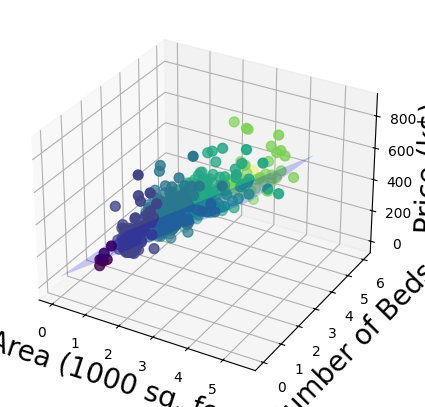

In [8]:
# No need to understand the following code.
fg = plt.figure(figsize=(5, 5)); ax = fg.add_subplot(projection='3d')
ax.scatter(x_area, x_beds, real_price, c=x_beds, s=50); ax.set_xlabel("Area (1000 sq. feet)", fontsize=20); ax.set_ylabel("Number of Beds", fontsize=20); ax.set_zlabel("Price (k$)", fontsize=20);

x_beds_grid = np.arange(0, 6, 0.5); x_area_grid = np.arange(0, 4, 0.5)
X, Y = np.meshgrid(x_beds_grid, x_area_grid)
zs = np.array(y_hat(np.array([np.ravel(X), np.ravel(Y)]).T)); Z = zs.reshape(X.shape)
ax.plot_surface(X, Y, Z, alpha=0.2, color="blue"); plt.show();

### Least Squares Problem

$\color{#EF5645}{\text{Definition}}$: Let be given a $m \times n$ matrix $A$ and $m$-vector $b$. The least squares problem is the problem of choosing an $n$-vector $x$ to minimize: 
$$\text{Obj}(x) = ‖Ax − b‖^2.$$

- $‖Ax − b‖^2$ is called the objective function $\text{Obj}$.


$\color{#6D7D33}{\text{Properties}}$:
- If $x^*$ is a solution of $Ax = b$, then $x^*$ is a solution of the least square problem. 
- The following is **not** true: if $x^*$ is a solution of the least square problem, then $x^*$ is the solution of $Ax=b$.
- $x^*$ is a solution of least squares problem if $‖A x^* − b‖^2 ≤ ‖Ax − b‖^2$ for any other $n$-vector $x$.

$\color{#047C91}{\text{Exercise}}$: Consider the matrix $A$ and vector $b$ as:

<center><img src="figs/lec11_Ab.png" width=400px alt="default"/></center>

Write the objective function associated to the least square problem defined by $A$ and $b$ in terms of entries of $x$.

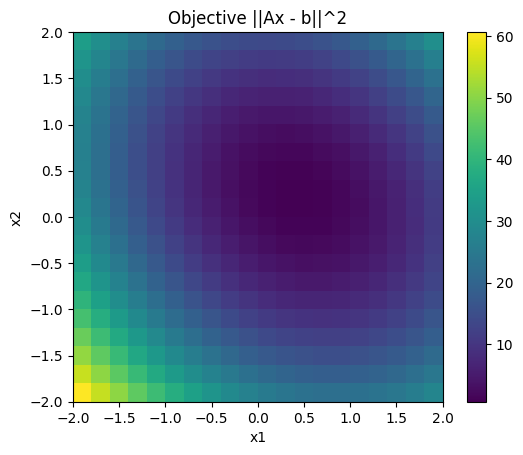

In [9]:
# No need to understand this code
import numpy as np; import matplotlib.pyplot as plt
objective = lambda x : (2 * x[0] - 1) ** 2 + (- x[0] + x[1]) ** 2 + (2 * x[1] + 1) ** 2
n_points, xmin, xmax, ymin, ymax = 20, -2, 2, -2, 2
x = np.arange(xmin, xmax, (xmax-xmin)/(n_points)); y = np.arange(ymin, ymax, (ymax-ymin)/(n_points)); xx = np.dstack(np.meshgrid(x, y)); Z = np.zeros((n_points, n_points))
for i in range(n_points):
    for j in range(n_points):
        Z[i, j] = objective(xx[i, j])
plt.imshow(Z, extent=[xmin, xmax, ymin, ymax]); plt.colorbar(); plt.xlabel("x1"); plt.ylabel("x2"); plt.title("Objective ||Ax - b||^2");

##### Outline: 11 Least Squares

- [Least Square Problem](#sec)
- **[Solution of Least Square Problem](#sec)**
- [Examples](#sec)

### Least Square Solution

$\color{#EF5645}{\text{Proposition}}$: 
- Consider a least square problem $||Ax - b||^2$ for matrix $A$ and vector $b$. 
- Assume that $A$ has linearly independent columns. 

Then, there is a unique solution $x^*$ defined as:
$$x^* = (A^T A)^{-1} A^Tb = A^\dagger b.$$
where $A^\dagger = (A^T A)^{-1} A^T$ is called the pseudo-inverse of $A$.

$\color{#047C91}{\text{Exercise}}$ (hard, optional): Using the fact that: 
$$||a + b ||^2 = ||a||^2 + ||b||^2 + 2 a^Tb,$$
prove that $\hat x$ defined in the previous slide is a solution. 
- Hint: Show that for any other $n$-vector $x$, we have: 
$$‖A  x − b‖^2 \geq ‖A \hat x − b‖^2.$$ 
- Hint 2: You will need to show that $A^T(A\hat{x} - b) = 0$.

$\color{#003660}{\text{In Python}}$, we use either:
-  `np.linalg.lstsq`: returns the solution as the first element of the returned tuple
- or formula of solution using transpose `.T`,  `np.linalg.inv` and `@`.

In [6]:
import numpy as np
A = np.array([[2, 0], [-1, 1], [0, 2]]); b = np.array([1, 0, -1]); 
#x_star = np.linalg.lstsq(A, b)[0]; print(x_star)
x_star_2 = np.linalg.inv(A.T @ A) @ A.T @ b; print(x_star_2)

[ 0.33333333 -0.33333333]


### True relationship: $f$


$\color{#EF5645}{\text{Definition}}$: When we believe that a scalar $y$ and an $n$-vector $x$ are related by model:
$$y ≈ f (x),$$
we use the following vocabulary:
- $x$ is called the feature or input vector,
- $y$ is called the actual outcome or response variable,
- $f : \mathbb{R}^n \rightarrow \mathbb{R}$ represents the "true" relationship between x and y.

Generally, we do not know $f$, we just assume it exists. Our goal is to learn $f$, or a reasonable approximation of it, using data.

### Model: $\hat{f}$

$\color{#EF5645}{\text{Definition}}$: Choosing a set of "basis functions": $f_j: \mathbb{R}^n \rightarrow \mathbb{R}$, for $j=1...p$, we model a guess or approximation of $f$ as:
$$\hat y = \hat{f}(x) = \theta_1 f_1(x) + ... + \theta_p f_p(x),$$
where:
- $\theta_j$ are parameters that we learn from data: $x^{(1)}, ..., x^{(N)},..., y^{(1)},... y^{(N)}$,
- $\hat{y}^{(i)} = \hat{f}(x^{(i)})$ is the prediction of $y^{(i)}$, for $i=1, ..., N$.

$\color{#047C91}{\text{Exercise}}$: What are the basis functions in linear regression? What are the parameters?

### Prediction Error (Residual)

$\color{#EF5645}{\text{Remark}}$: Our predictions are $\hat y_i = \hat f(x_i)$, for $i=1, ..., N$. If our model is good, then $\hat{y}^{(i)} ≈ y^{(i)}$ for $i=1, ..., N$.


$\color{#EF5645}{\text{Definition}}$: We define the _prediction error_, or _residual_ for each $i=1, ..., N$: 
$$r_i = y^{(i)} - \hat{y}^{(i)}.$$

### Least Square Data Fitting


$\color{#EF5645}{\text{Definition}}$: The Least Square Data Fitting problem is the problem of choosing model's parameters $\theta_1, ..., \theta_n$ that minimize:
$$\big(\frac{r_1^2 + ... + r_N^2}{N}\big)^{1/2}.$$

$\color{#6D7D33}{\text{Proposition}}$: Define the $N \times p$ matrix $A$ with elements $A_{ij} = f_j(x^{(i)})$, such that $\hat y =A \theta$, where $y = (y^{(1)}, . . . , y^{(N)})$ is vector of outcomes. 

The Least Square Data Fitting problem amounts to choose $\theta$ that minimizes:
$$||A\theta - y||^2,$$
which shows that it is effectively a Least Square Problem. 

$\color{#6D7D33}{\text{Proposition}}$: Consider the Least Square Data Fitting Problem. Assuming that the columns of $A$ are independent, the solution is:
$$\hat \theta = (A^TA)^{-1}A^Ty.$$

### Regression of House Prices

Consider the model: $\hat f (x) = \theta_1 f_1(x) + \theta_2 f_2(x)$ with $f_1(x) = 1$ and $f_2(x) = x$, i.e.:
$$\hat y = \hat f (x) = \theta_1 + \theta_2 x,$$
where:
- $x$: house's area in 1000 sq feet,
- $y$: house's price in k\$.

$\color{#047C91}{\text{Example}}$: Write down the LS problem associated to this learning. What are $A$, $y$? Explain how you can find $\hat \theta_1$ and $\hat \theta_2$ with Python. At home: compute $\hat \theta_1$ and $\hat \theta_2$ manually (hard).